### KNN Challenge - Model comparison

We will begin by finding a data set, building a KNN Regression and an OLS regression model. We will then compare the two, and determine How similar they are and try to determine whether they miss in different ways.

In [1]:
%matplotlib inline
import math

import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn import linear_model, preprocessing, cross_validation, neighbors
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns

/Users/c/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We will begin by importing our dataset, and preprocessing the data using sklearns MinMaxScaler.

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original', delim_whitespace = True, header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = df.drop(['car_name'], 1)
df = df.dropna()

df = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df_scaled)


Below we will create and display a correlation matrix and a heatmap to determine if any of our features are strongly correlated.

          0         1         2         3         4         5         6  \
0  1.000000 -0.777618 -0.805127 -0.778427 -0.832244  0.423329  0.580541   
1 -0.777618  1.000000  0.950823  0.842983  0.897527 -0.504683 -0.345647   
2 -0.805127  0.950823  1.000000  0.897257  0.932994 -0.543800 -0.369855   
3 -0.778427  0.842983  0.897257  1.000000  0.864538 -0.689196 -0.416361   
4 -0.832244  0.897527  0.932994  0.864538  1.000000 -0.416839 -0.309120   
5  0.423329 -0.504683 -0.543800 -0.689196 -0.416839  1.000000  0.290316   
6  0.580541 -0.345647 -0.369855 -0.416361 -0.309120  0.290316  1.000000   
7  0.565209 -0.568932 -0.614535 -0.455171 -0.585005  0.212746  0.181528   

          7  
0  0.565209  
1 -0.568932  
2 -0.614535  
3 -0.455171  
4 -0.585005  
5  0.212746  
6  0.181528  
7  1.000000  


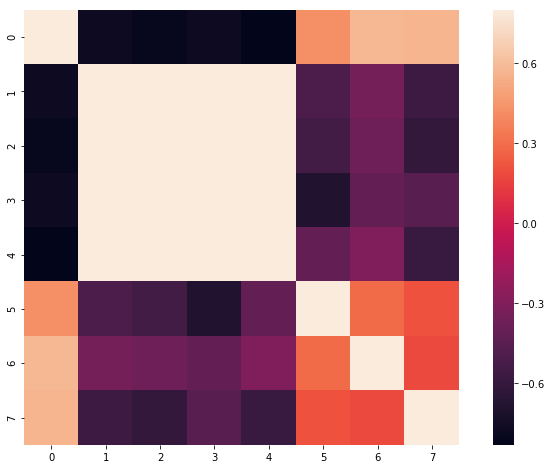

In [3]:
corrmat = df.corr()
print(corrmat)

# Creating and displaying a heat map of the selected variables.
plt.figure(figsize=[12,8])
sns.heatmap(corrmat, vmax=.8, square=True);

Cylinders, displacement, horsepower and weight are all very highly correlated amongst each other. We will combine the four features into one in order to better represent the data.

In [4]:
df['engine_and_power'] = (df[1] + df[2] + df[3] + df[4]) / 4
df.drop([1, 2, 3, 4], inplace = True)

Below we will create our first linear regression model utilizing cross validation to get a more accurate rating of our prediction rate. We will display coefficients, the intercept and the r square value of the training and testing data sets.

In [5]:
x = np.array(df.drop([0],1))
y = np.array(df[0]).reshape(-1,1)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2, random_state=20)
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

print('\nCoefficients: \n', linear_regression.coef_)
print('\nIntercept: \n', linear_regression.intercept_)
print('Testing on Sample: ' + str(linear_regression.score(X_train, y_train)))
print('With 20% Holdout: ' + str(linear_regression.fit(X_test, y_test).score(X_test, y_test)))



Coefficients: 
 [[ 4.11435926e+11  4.11435926e+11  4.11435926e+11  4.11435926e+11
   8.45804711e-02  2.46603973e-01  6.92026783e-02 -1.64574371e+12]]

Intercept: 
 [0.42523907]
Testing on Sample: 0.813787603892858
With 20% Holdout: 0.8576594515495437


Finally we will compare the previous model with a KNN regressor. 

In [6]:
KNN = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')
KNN.fit(X_train, y_train)

print('Testing on Sample: ' + str(KNN.score(X_train, y_train)))
print('With 20% Holdout: ' + str(KNN.score(X_test, y_test)))



Testing on Sample: 0.8990894282017561
With 20% Holdout: 0.8907094229211929


In the conclusion of our experiment it appears that KNN is more accurate than ordinary least squares regression with our current data set. The KNN algorhithm remained very consistent across the training and test data. It is interesting to see that the OLS model predicted the testing data better than the training data.